# InSight hv inversion
---

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
import os
import glob

import hvsrpy
from hvsrpy import utils


## hvsr 
---

In [2]:
### Time Domain Settings

windowlength = 60

filter_bool = False       
filter_flow = 0.1                   
filter_fhigh = 10                  
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
# 余弦锥度宽度 {0. - 1.}。 Geopsy 默认值 0.05 等于 0.1 -> 建议使用 0.1
width = 0.1

### Frequency Domain Settings

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40
# Minimum frequency after resampling
resample_fmin = 0.1
# Maximum frequency after resampling
resample_fmax = 10
# Number of frequencies after resampling 重采样后的频率点数
resample_fnum = 1000
# Type of resampling {'log', 'linear'}
resample_type = 'linear'
# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None


### HVSR Settings

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"


### Plot Settings

# Manually set the ylimits of the HVSR figures. Default is None so limits will be set automatically.
ymin, ymax = None, None

### Perform Calculation
---

Elapsed Time: 0.39 seconds


Text(0, 0.5, 'HVSR Amplitude')

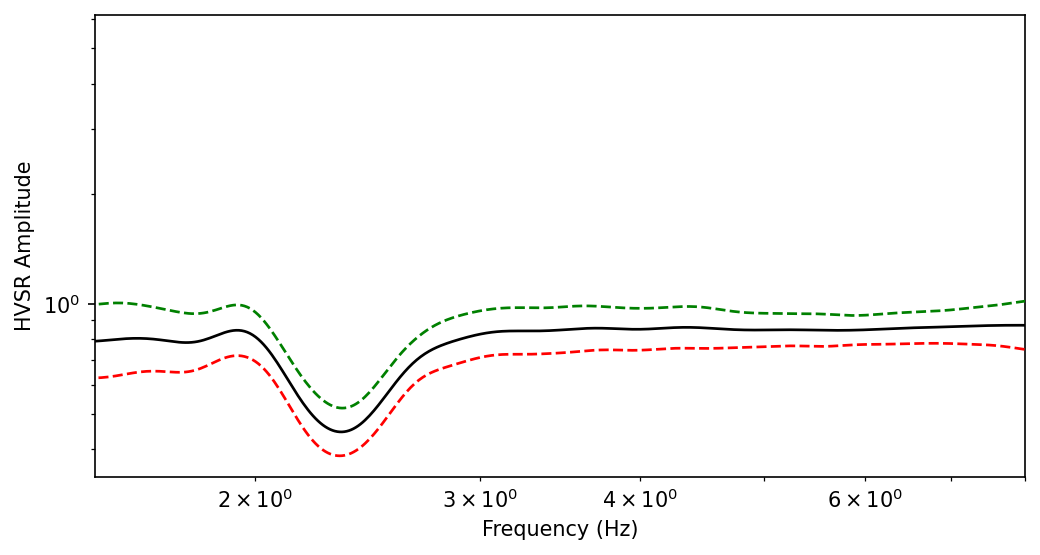

In [3]:
file_name = '../InSight-seismic-data-downloader/DATA/2.4_HZ/C/S0423d/S0423d_VEL.mseed'
#file_name = 'data_copy.mseed'

fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(1, 1, 1)

start = time.time()
sensor = hvsrpy.Sensor3c.from_mseed(file_name)
bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}
hv = sensor.hv(windowlength, bp_filter, width, bandwidth, resampling, method, f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
end = time.time()
print(f"Elapsed Time: {str(end-start)[0:4]} seconds")

individual_width = 0.3
median_width = 1.3
title="Before Rejection"

# Mean Curve 
ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=median_width)

# Mean +/- Curve
ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc),
        color='r', linestyle='--', linewidth=median_width, zorder=3)
ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc),
        color='g', linestyle='--', linewidth=median_width, zorder=3)


ax.set_xlim(1.5, 8.)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("HVSR Amplitude")

In [8]:
# np 按列合并
hv_data = np.column_stack((hv.frq, hv.mean_curve(distribution_mc)))
np.savetxt('hv.txt', hv_data, fmt='%.6f', delimiter=' ')

### HVs
---

Elapsed Time: 0.15 seconds
Elapsed Time: 0.13 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.18 seconds
Elapsed Time: 0.12 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.20 seconds
Elapsed Time: 0.12 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.13 seconds
Elapsed Time: 0.13 seconds
Elapsed Time: 0.19 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.15 seconds
Elapsed Time: 0.15 seconds
Elapsed Time: 0.19 seconds
Elapsed Time: 0.19 seconds
Elapsed Time: 0.25 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.12 seconds
Elapsed Time: 0.15 seconds
Elapsed Time: 0.19 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.15 seconds
Elapsed Time: 0.11 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.12 seconds
Elapsed Time: 0.17 seconds
Elapsed Time: 0.17 seconds
Elapsed Time: 0.13 seconds
Elapsed Time: 0.21 seconds
Elapsed Time: 0.14 seconds
Elapsed Time: 0.16 seconds
Elapsed Time: 0.11 seconds
E

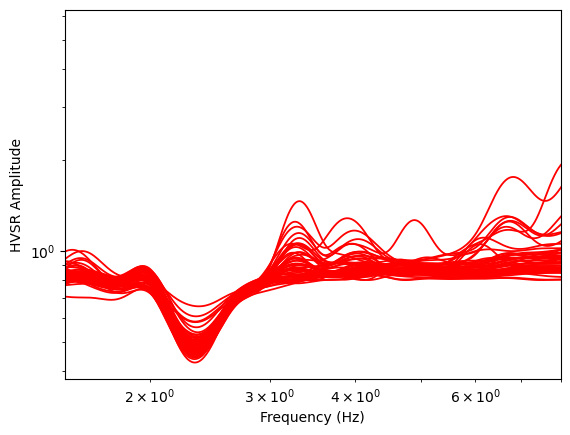

In [4]:
files = os.listdir('../InSight-seismic-data-downloader/DATA/2.4_HZ/B/')
files.sort()

for file in files:
    file_dir = os.path.join('../InSight-seismic-data-downloader/DATA/2.4_HZ/B/', file)
    file_name = glob.glob(file_dir+'/*_VEL.mseed')[0]

    sensor = hvsrpy.Sensor3c.from_mseed(file_name)
    
    start = time.time()
    sensor = hvsrpy.Sensor3c.from_mseed(file_name)
    bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
    resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}
    hv = sensor.hv(windowlength, bp_filter, width, bandwidth, resampling, method, f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
    end = time.time()
    print(f"Elapsed Time: {str(end-start)[0:4]} seconds")

    individual_width = 0.3
    median_width = 1.3
    title="Before Rejection"

    # Mean Curve 
    plt.plot(hv.frq, hv.mean_curve(distribution_mc), color='r', linewidth=median_width)

    # # Mean +/- Curve
    # plt.plot(hv.frq, hv.nstd_curve(-1, distribution_mc),
    #         color='r', linestyle='--', linewidth=median_width, zorder=3)
    # plt.plot(hv.frq, hv.nstd_curve(+1, distribution_mc),
    #         color='g', linestyle='--', linewidth=median_width, zorder=3)


    plt.xlim(1.5, 8.)
    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("HVSR Amplitude")


In [5]:
files = os.listdir('../InSight-seismic-data-downloader/DATA/2.4_HZ/B/')

file_name = '../InSight-seismic-data-downloader/DATA/2.4_HZ/C/S0423d/S0423d_VEL.mseed'

start = time.time()
sensor = hvsrpy.Sensor3c.from_mseed(file_name)
bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
resampling = {"minf":resample_fmin, "mpltf":resample_fmplt, "nf":resample_fnum, "res_type":resample_type}
hv = sensor.hv(windowlength, bp_filter, width, bandwidth, resampling, method, f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
end = time.time()
print(f"Elapsed Time: {str(end-start)[0:4]} seconds")

individual_width = 0.3
median_width = 1.3
title="Before Rejection"

# Mean Curve 
plt.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=median_width)

# # Mean +/- Curve
# plt.plot(hv.frq, hv.nstd_curve(-1, distribution_mc),
#         color='r', linestyle='--', linewidth=median_width, zorder=3)
# plt.plot(hv.frq, hv.nstd_curve(+1, distribution_mc),
#         color='g', linestyle='--', linewidth=median_width, zorder=3)


plt.set_xlim(1.5, 8.)
plt.set_xscale('log')
plt.set_yscale('log')

plt.set_xlabel("Frequency (Hz)")
plt.set_ylabel("HVSR Amplitude")

NameError: name 'resample_fmplt' is not defined

## syn data HVSR
---

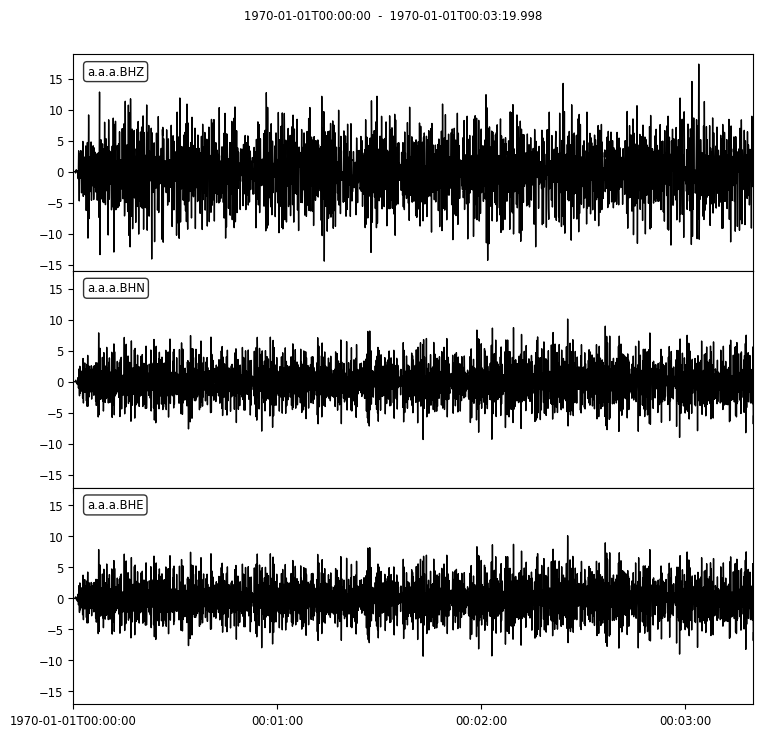

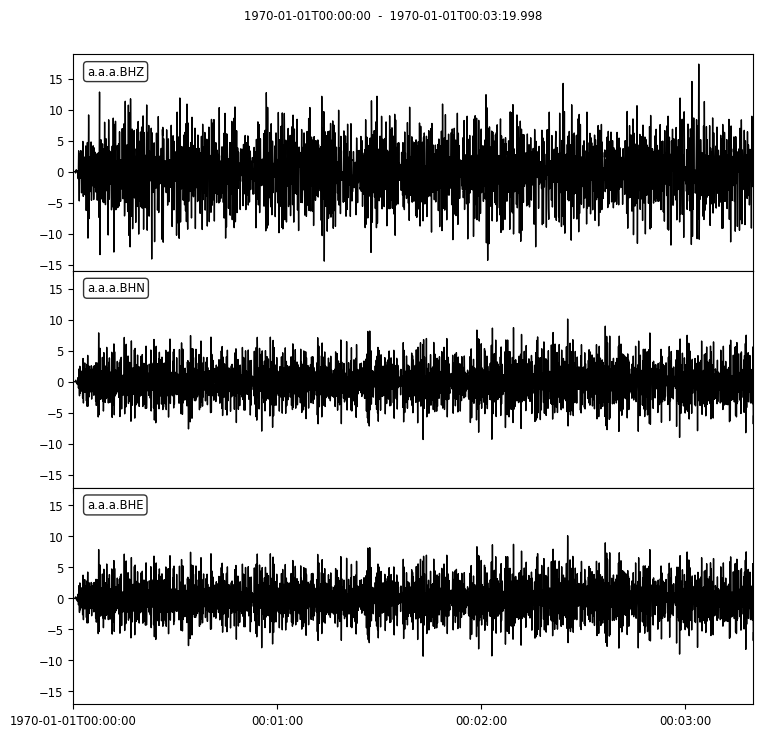

In [ ]:
st.plot()

In [ ]:
## read syn data from .txt

import subprocess
path_x = 'mac:~/MyProjects/PassiveFDTD/x.txt'
path_z = 'mac:~/MyProjects/PassiveFDTD/z.txt'
path_data = 'mac:~/MyProjects/geopsypack-win64-3.4.2/'
subprocess.call(['scp', '-r', path_x, './'])
subprocess.call(['scp', '-r', path_z, './'])


data_h = np.loadtxt('x.txt')
data_v = np.loadtxt('z.txt')
dt = 2.e-3
sampling_rate = 1/dt

traceX = obspy.Trace(data=np.array(data_h[:]), header={'network': 'a', 'station': 'a', 'location': 'a', 'channel': 'BHE', 'sampling_rate': sampling_rate})
traceY = obspy.Trace(data=np.array(data_h[:]), header={'network': 'a', 'station': 'a', 'location': 'a', 'channel': 'BHN', 'sampling_rate': sampling_rate})
traceZ = obspy.Trace(data=np.array(data_v[:]), header={'network': 'a', 'station': 'a', 'location': 'a', 'channel': 'BHZ', 'sampling_rate': sampling_rate})   

st = obspy.Stream([traceX, traceY, traceZ])

#将数据保存到文件
st.write('data_copy.mseed', format='MSEED')
subprocess.call(['scp', '-r', './data_copy.mseed', path_data])
### Time Domain Settings

file_name = 'data_copy.mseed'

windowlength = 60

filter_bool = False       
filter_flow = 0.1                   
filter_fhigh = 100                  
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
width = 0.1

### Frequency Domain Settings

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40
# Minimum frequency after resampling
resample_fmin = 1
# Maximum frequency after resampling
resample_fmax = 1000
# Number of frequencies after resampling 重采样后的频率点数
resample_fnum = 1000
# Type of resampling {'log', 'linear'}
resample_type = 'linear'
# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None


### HVSR Settings

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
# 组合水平分量的方法 {"squared-average", "geometric-mean", "single-azimuth"}。
# Geopsy 的默认值是 "squared-average" -> 建议使用 "geometric-mean"。
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
# 如果 method="single-azimuth"，则设置从北方顺时针方向的方位角。 如果 method!="single-azimuth"，值将被忽略。
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
# 布尔值控制是否由 Cox 等人提出的频域抑制。 (2020) 已应用。
# Geopsy 不提供此功能。
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"


### Plot Settings

# Manually set the ylimits of the HVSR figures. Default is None so limits will be set automatically.
ymin, ymax = None, None

### Perform Calculation
---

/home/erbiaoger/miniconda3/lib/python3.9/site-packages/hvsrpy/sensor3c.py:494: RuntimeWarning: invalid value encountered in true_divide
  hor._amp /= ver._amp


ValueError: amplitude may not contain nan.

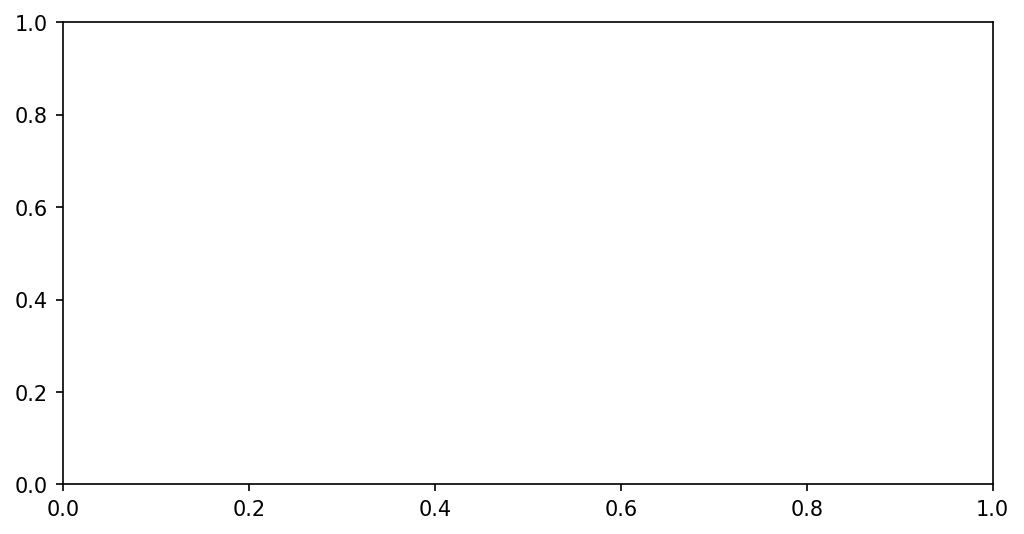

In [ ]:
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(1, 1, 1)

start = time.time()
sensor = hvsrpy.Sensor3c.from_mseed(file_name)
bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}
hv = sensor.hv(windowlength, bp_filter, width, bandwidth, resampling, method, f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
end = time.time()
print(f"Elapsed Time: {str(end-start)[0:4]} seconds")

individual_width = 0.3
median_width = 1.3
title="Before Rejection"

# Mean Curve 
ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=median_width)

# # Mean +/- Curve
# ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc),
#         color='r', linestyle='--', linewidth=median_width, zorder=3)
# ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc),
#         color='g', linestyle='--', linewidth=median_width, zorder=3)


ax.set_xlim(10., 100.)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("HVSR Amplitude")

### test
---

In [ ]:
## read real data to .mseed
truest = obspy.read('../InSight-seismic-data-downloader/DATA/2.4_HZ/C/S0423d/S0423d_VEL.mseed')

data_h = truest[0].data
data_v = truest[2].data
sampling_rate = truest[0].stats.sampling_rate

traceX = obspy.Trace(data=np.array(data_h[:]), header={'network': 'a', 'station': 'a', 'location': 'a', 'channel': 'BHE', 'sampling_rate': sampling_rate})
traceY = obspy.Trace(data=np.array(data_h[:]), header={'network': 'a', 'station': 'a', 'location': 'a', 'channel': 'BHN', 'sampling_rate': sampling_rate})
traceZ = obspy.Trace(data=np.array(data_v[:]), header={'network': 'a', 'station': 'a', 'location': 'a', 'channel': 'BHZ', 'sampling_rate': sampling_rate})   

st = obspy.Stream([traceX, traceY, traceZ])

#将数据保存到文件
st.write('data_copy.mseed', format='MSEED')


In [ ]:
# np 按列合并
hv_data = np.column_stack((hv.frq, hv.mean_curve(distribution_mc)))
# f1 = 1.5; f2 = 8.0
# n1 = np.abs(hv_data[:, 0] - f1).argmin()
# n2 = np.abs(hv_data[:, 0] - f2).argmin()

In [ ]:
np.savetxt('hv.txt', hv_data)

## ellipicity
---

### 1.计算瑞雷波/勒夫波前三个阶次的相速度频散曲线(根据输入模型计算理论频散曲线)

### 椭圆率和椭圆率敏感性内核

In [ ]:
import numpy as np
from disba import Ellipticity, EllipticitySensitivity
import matplotlib
from matplotlib import pyplot as plt

from disba._helpers import resample

# thickness, Vp, Vs, density
# km, km/s, km/s, g/cm3
velocity_model = np.array([
  [0.003, 0.20, 0.12, 2.00],
  [0.010, 1.20, 0.70, 2.00],
  [0.020, 3.00, 1.70, 2.00],
  [0.140, 5.00, 2.85, 2.00],
  [1.000, 3.00, 1.70, 2.00],
])

t = np.arange(0.001, 10, 0.001)

#velocity_model=np.loadtxt('simple_mod.txt',skiprows=1)
velocity_model_thickness=velocity_model.T[0]

## 0.1.对原始速度模型进行重采样
dz = 0.0005
velocity_model = resample(velocity_model_thickness.T, velocity_model, dz)
velocity_model = np.array(velocity_model[1])
velocity_model.T[0] = dz

ell = Ellipticity(*velocity_model.T)
rel = ell(t, mode=1)


with plt.style.use("my"):
  plt.plot(rel.period, rel.ellipticity)


OSError: 'my' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [ ]:
nt = 10000
n = len(rel.ellipticity)
dt = rel.period[3] - rel.period[2]
t = np.arange(0, nt*dt, dt)

x = np.zeros(nt - n)
print(len(rel.ellipticity), len(x))
y = np.concatenate(rel.ellipticity, x)

865 9135


TypeError: only integer scalar arrays can be converted to a scalar index

(1.5, 8.0)

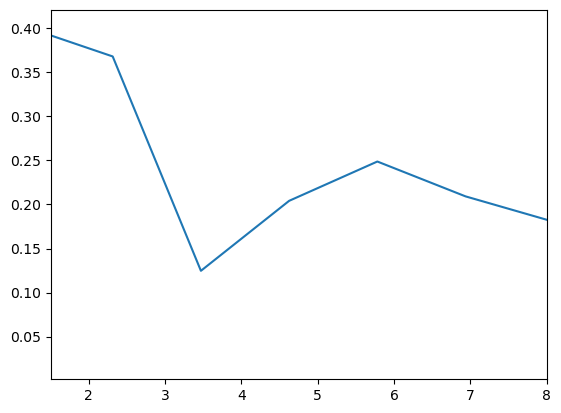

In [ ]:
from numpy.fft import fft, fftfreq

d = rel.period[1] - rel.period[0]

n = len(rel.period)
freq = fftfreq(n, d)
freq = freq[:n//2]
Y = fft(rel.ellipticity)
Y = 2*abs(Y[:n//2])/n

plt.plot(freq, Y)
plt.xlim(1.5, 8.0)


In [ ]:
Y

array([0.13015061, 0.40229304, 0.36794458, 0.12456763, 0.20484287,
       0.24896481, 0.20922419, 0.18035427, 0.14856403, 0.12282716,
       0.11565739, 0.13149814, 0.16586104, 0.19551801, 0.21017492,
       0.20785341, 0.18852519, 0.1544592 , 0.11012016, 0.0618998 ,
       0.02002754, 0.03102112, 0.05795085, 0.07410362, 0.07935805,
       0.07716586, 0.07312477, 0.07249093, 0.07625647, 0.08085322,
       0.08214823, 0.07808789, 0.06911167, 0.05785052, 0.04853657,
       0.04499896, 0.04700773, 0.05108121, 0.05504088, 0.05909736,
       0.0642358 , 0.07034753, 0.07576532, 0.07827029, 0.07630931,
       0.06979755, 0.06058511, 0.05262182, 0.05044187, 0.05455579,
       0.06062356, 0.06438484, 0.06410795, 0.06064249, 0.056998  ,
       0.05679388, 0.06104179, 0.06705767, 0.07124728, 0.07139683,
       0.06726834, 0.06059853, 0.05473868, 0.05304382, 0.05587764,
       0.06033482, 0.06337554, 0.06375   , 0.06211206, 0.06037203,
       0.0603709 , 0.06234743, 0.06479696, 0.06586284, 0.06462

In [ ]:
for i in range(10):
    misfit = hv.mean_curve(distribution_mc) - rel.ellipticity
    

ValueError: operands could not be broadcast together with shapes (1000,) (864,) 

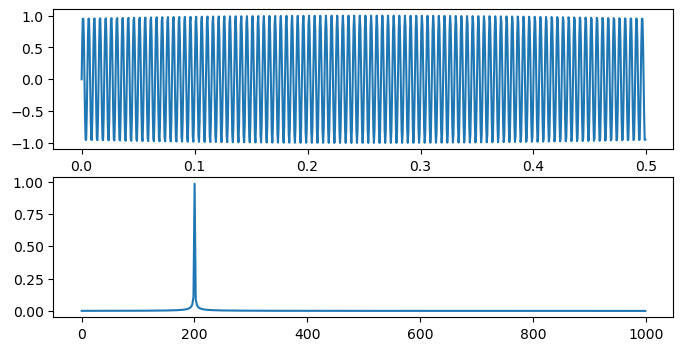

In [ ]:
dt = 0.0001  # 秒 delta t
n = 1000   # 个
w = 200     # Hz
fig = plt.figure(figsize=(8, 4))
t = d * np.arange(n)
y = np.sin(2*np.pi * w * t)
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(t, y)

Y = np.fft.fft(y)
T = np.fft.fftfreq(n, d)
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(T[0:n//2], 2*np.abs(Y[0:n//2])/n) 
#plt.xlim(0, 300)

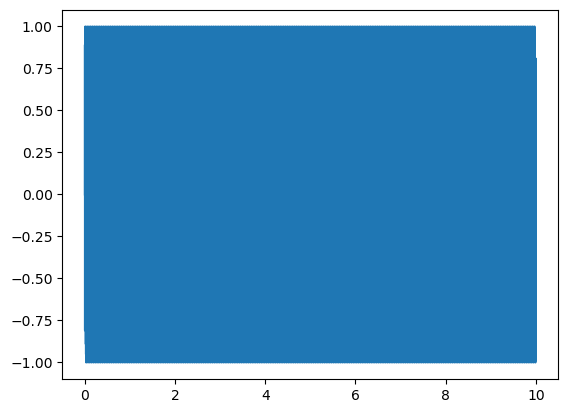

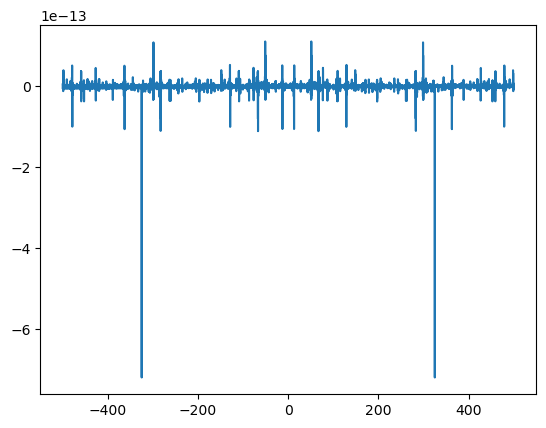

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 产生正弦信号
Ts=0.001
t = Ts*np.array(range(10000))
x = np.sin(2*np.pi*325*t)
 
# FFT变换
X=np.fft.fft(x,np.size(x,0),axis=0)/x.size*2
freq=np.fft.fftfreq(np.size(x,0),Ts)
 
plt.figure(1)
plt.plot(t,x)
plt.show()
plt.figure(2)
plt.plot(freq,np.real(X))
plt.show()